In [137]:
import pandas as pd

# Sample-specific metadata 
date = "2024-09-08"

# Load the CSV file into a pandas DataFrame
# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5
file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6
raw_df = pd.read_csv(file_path)

#load basel data for polaizer
h_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,...,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,4.000000,4.000000,0.394925,4.000000,4.000000,0.413223,4.000000,4.000000,...,4.000000,4.000000,0.388122,4.000000,3.983489,0.389276,4.000000,4.000000,4.000000,4.000000
1,300.5,0.431662,4.000000,4.000000,0.392923,3.970814,4.000000,0.411178,4.000000,4.000000,...,4.000000,4.000000,0.386125,3.994737,3.994713,0.387221,4.000000,4.000000,3.973701,4.000000
2,301.0,0.429235,4.000000,4.000000,0.390655,3.994535,4.000000,0.408850,3.988463,4.000000,...,4.000000,4.000000,0.384006,4.000000,3.910665,0.385221,4.000000,4.000000,3.994414,3.992867
3,301.5,0.426603,3.988345,3.970443,0.388120,3.994535,4.000000,0.406354,4.000000,3.967144,...,3.961568,4.000000,0.382072,4.000000,3.947889,0.382982,4.000000,4.000000,3.980757,3.989014
4,302.0,0.423869,4.000000,3.957882,0.385657,4.000000,3.982980,0.403841,4.000000,4.000000,...,4.000000,4.000000,0.379584,4.000000,4.000000,0.380788,4.000000,4.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.186523,0.278575,0.106130,0.177678,0.269270,0.109067,0.181073,0.272261,...,0.179332,0.270136,0.106552,0.179977,0.269247,0.107526,0.181269,0.270606,0.165349,0.072880
1197,898.5,0.114585,0.186335,0.276814,0.106129,0.177485,0.267559,0.109018,0.180786,0.270555,...,0.178956,0.268486,0.106583,0.179411,0.267587,0.107543,0.180684,0.269052,0.163506,0.072257
1198,899.0,0.114699,0.185847,0.275167,0.106262,0.176976,0.266026,0.109107,0.180272,0.269082,...,0.178480,0.267099,0.106671,0.179022,0.266326,0.107642,0.180425,0.267970,0.161557,0.071873
1199,899.5,0.114711,0.185530,0.273863,0.106296,0.176663,0.264913,0.109118,0.180015,0.268090,...,0.178187,0.266163,0.106599,0.178752,0.265403,0.107643,0.180003,0.266969,0.159992,0.071622


6


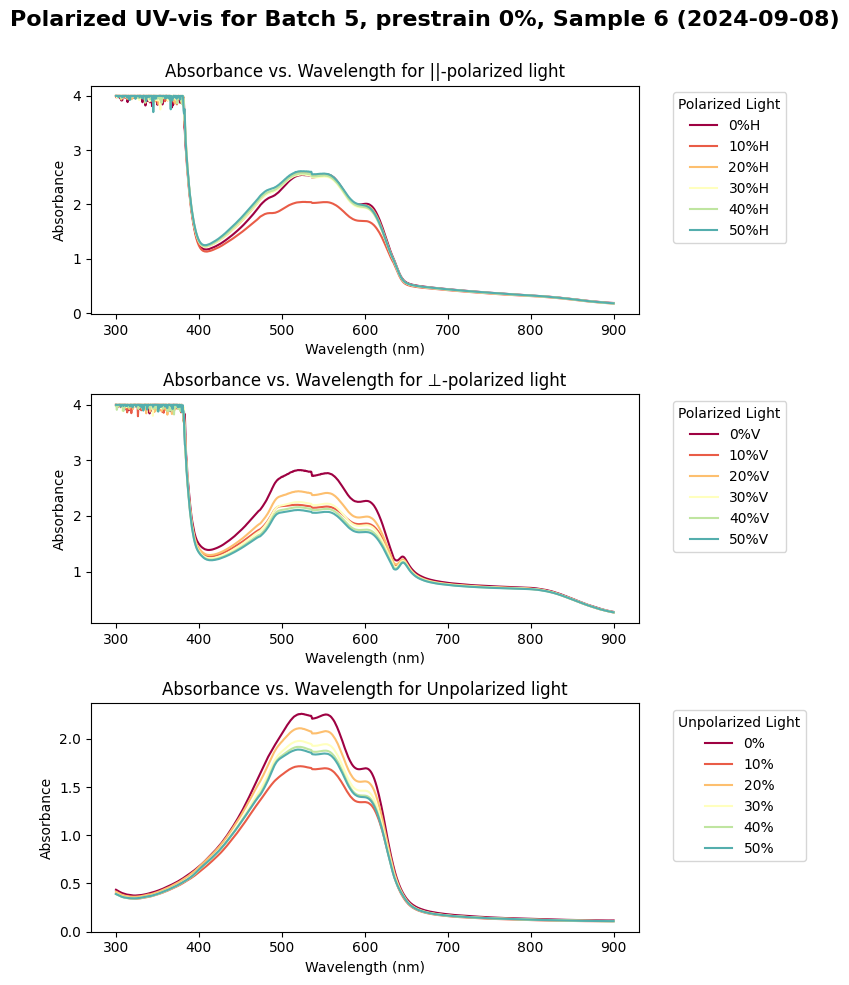

In [138]:
##### plotting #####
df = raw_df
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set up figure with 3 subplots for polarized and unpolarized UV-vis data
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle(f'Polarized UV-vis for Batch 5, prestrain 0%, Sample {s_num} ({date})\n', fontsize=16, fontweight='bold')

# Generate colors for plotting
colors = cm.Spectral([i / ((df.shape[1] - 3)//3) for i in range((df.shape[1] - 1)//3)])
print(((df.shape[1] - 3)//3))
# Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    axs[0].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[0].set_title('Absorbance vs. Wavelength for ||-polarized light')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Absorbance')
# axs[0].set_xlim((400, 700))
# axs[0].set_ylim((0, 1.1))
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    axs[1].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[1].set_title('Absorbance vs. Wavelength for ⊥-polarized light')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Absorbance')
# axs[1].set_xlim((400, 700))
# axs[1].set_ylim((0, 1.1))
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Unpolarized Absorbance (columns without 'H' or 'V')
for i, column in enumerate([col for col in df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
    axs[2].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[2].set_title('Absorbance vs. Wavelength for Unpolarized light')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Absorbance')
# axs[2].set_xlim((400, 700))
# axs[2].set_ylim((0, 1))
axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [139]:
# remoce bad data
if file_path == 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv':
    raw_df.drop(columns=[col for col in raw_df.columns if '10%' in col], inplace=True)
raw_df

,Wavelength,0%,0%H,0%V,20%,20%H,20%V,30%,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,4.000000,4.000000,0.413223,4.000000,4.000000,0.392195,4.000000,4.000000,0.388122,4.000000,3.983489,0.389276,4.000000,4.000000,4.000000,4.000000
1,300.5,0.431662,4.000000,4.000000,0.411178,4.000000,4.000000,0.390284,4.000000,4.000000,0.386125,3.994737,3.994713,0.387221,4.000000,4.000000,3.973701,4.000000
2,301.0,0.429235,4.000000,4.000000,0.408850,3.988463,4.000000,0.388094,4.000000,4.000000,0.384006,4.000000,3.910665,0.385221,4.000000,4.000000,3.994414,3.992867
3,301.5,0.426603,3.988345,3.970443,0.406354,4.000000,3.967144,0.385892,3.961568,4.000000,0.382072,4.000000,3.947889,0.382982,4.000000,4.000000,3.980757,3.989014
4,302.0,0.423869,4.000000,3.957882,0.403841,4.000000,4.000000,0.383576,4.000000,4.000000,0.379584,4.000000,4.000000,0.380788,4.000000,4.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.186523,0.278575,0.109067,0.181073,0.272261,0.107643,0.179332,0.270136,0.106552,0.179977,0.269247,0.107526,0.181269,0.270606,0.165349,0.072880
1197,898.5,0.114585,0.186335,0.276814,0.109018,0.180786,0.270555,0.107635,0.178956,0.268486,0.106583,0.179411,0.267587,0.107543,0.180684,0.269052,0.163506,0.072257
1198,899.0,0.114699,0.185847,0.275167,0.109107,0.180272,0.269082,0.107733,0.178480,0.267099,0.106671,0.179022,0.266326,0.107642,0.180425,0.267970,0.161557,0.071873
1199,899.5,0.114711,0.185530,0.273863,0.109118,0.180015,0.268090,0.107773,0.178187,0.266163,0.106599,0.178752,0.265403,0.107643,0.180003,0.266969,0.159992,0.071622


In [140]:
### resscale data to 0 -> 1 ###
# define function to normalize the uv-vis data which ranges from -4 to 4
rescale_absorbance = lambda absorbance_data: (absorbance_data + 4) * (1 / 8)
df_rescaled = raw_df.copy()
# Apply the normalization to all columns except the 'Wavelength' column
df_rescaled.iloc[:, 1:] = df_rescaled.iloc[:, 1:].apply(rescale_absorbance)
df_rescaled

,Wavelength,0%,0%H,0%V,20%,20%H,20%V,30%,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.554223,1.000000,1.000000,0.551653,1.000000,1.000000,0.549024,1.000000,1.000000,0.548515,1.000000,0.997936,0.548659,1.000000,1.000000,1.000000,1.000000
1,300.5,0.553958,1.000000,1.000000,0.551397,1.000000,1.000000,0.548786,1.000000,1.000000,0.548266,0.999342,0.999339,0.548403,1.000000,1.000000,0.996713,1.000000
2,301.0,0.553654,1.000000,1.000000,0.551106,0.998558,1.000000,0.548512,1.000000,1.000000,0.548001,1.000000,0.988833,0.548153,1.000000,1.000000,0.999302,0.999108
3,301.5,0.553325,0.998543,0.996305,0.550794,1.000000,0.995893,0.548237,0.995196,1.000000,0.547759,1.000000,0.993486,0.547873,1.000000,1.000000,0.997595,0.998627
4,302.0,0.552984,1.000000,0.994735,0.550480,1.000000,1.000000,0.547947,1.000000,1.000000,0.547448,1.000000,1.000000,0.547598,1.000000,1.000000,1.000000,0.999098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.514323,0.523315,0.534822,0.513633,0.522634,0.534033,0.513455,0.522416,0.533767,0.513319,0.522497,0.533656,0.513441,0.522659,0.533826,0.520669,0.509110
1197,898.5,0.514323,0.523292,0.534602,0.513627,0.522598,0.533819,0.513454,0.522370,0.533561,0.513323,0.522426,0.533448,0.513443,0.522586,0.533632,0.520438,0.509032
1198,899.0,0.514337,0.523231,0.534396,0.513638,0.522534,0.533635,0.513467,0.522310,0.533387,0.513334,0.522378,0.533291,0.513455,0.522553,0.533496,0.520195,0.508984
1199,899.5,0.514339,0.523191,0.534233,0.513640,0.522502,0.533511,0.513472,0.522273,0.533270,0.513325,0.522344,0.533175,0.513455,0.522500,0.533371,0.519999,0.508953


5


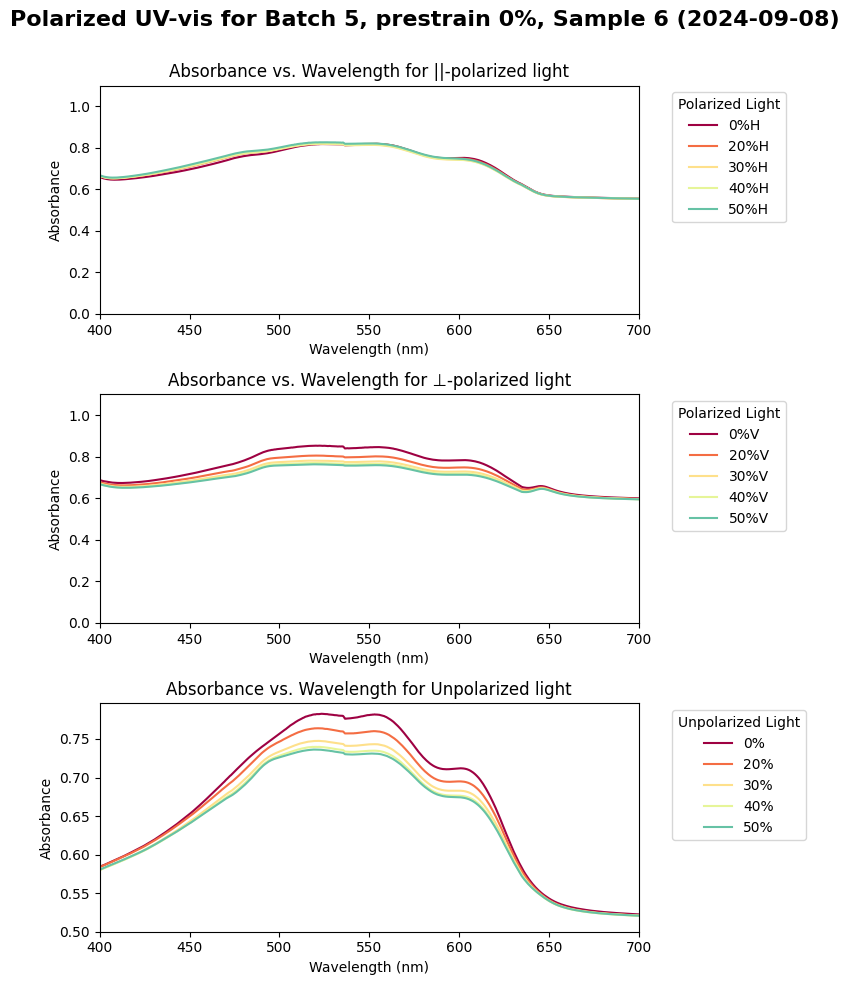

In [141]:
##### plotting #####
df = df_rescaled
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set up figure with 3 subplots for polarized and unpolarized UV-vis data
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle(f'Polarized UV-vis for Batch 5, prestrain 0%, Sample {s_num} ({date})\n', fontsize=16, fontweight='bold')

# Generate colors for plotting
colors = cm.Spectral([i / ((df.shape[1] - 3)//3) for i in range((df.shape[1] - 1)//3)])
print(((df.shape[1] - 3)//3))
# Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    axs[0].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[0].set_title('Absorbance vs. Wavelength for ||-polarized light')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Absorbance')
axs[0].set_xlim((400, 700))
axs[0].set_ylim((0, 1.1))
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    axs[1].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[1].set_title('Absorbance vs. Wavelength for ⊥-polarized light')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Absorbance')
axs[1].set_xlim((400, 700))
axs[1].set_ylim((0, 1.1))
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Unpolarized Absorbance (columns without 'H' or 'V')
for i, column in enumerate([col for col in df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
    axs[2].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[2].set_title('Absorbance vs. Wavelength for Unpolarized light')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Absorbance')
axs[2].set_xlim((400, 700))
# axs[2].set_ylim((0, 1))
axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [142]:
#### baseline correction ####
df = df_rescaled.copy()
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    print(column)
    df[column] = 1 - ((1 - df[column].values) / (1 - df['H_baseline'].values))

for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    print(column)
    df[column] = 1 - ((1 - df[column].values) / (1 - df['V_baseline'].values))

df

0%H
20%H
30%H
40%H
50%H
0%V
20%V
30%V
40%V
50%V


/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:5: RuntimeWarning: divide by zero encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['H_baseline'].values))
/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:5: RuntimeWarning: invalid value encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['H_baseline'].values))
/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:9: RuntimeWarning: divide by zero encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['V_baseline'].values))
/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:9: RuntimeWarning: invalid value encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['V_baseline'].values))


,Wavelength,0%,0%H,0%V,20%,20%H,20%V,30%,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.554223,NaN,NaN,0.551653,NaN,NaN,0.549024,NaN,NaN,0.548515,NaN,-inf,0.548659,NaN,NaN,1.000000,1.000000
1,300.5,0.553958,NaN,1.000000,0.551397,NaN,1.000000,0.548786,NaN,1.000000,0.548266,-inf,0.798963,0.548403,NaN,1.000000,0.996713,1.000000
2,301.0,0.553654,1.000000,1.000000,0.551106,-0.617488,1.000000,0.548512,1.000000,1.000000,0.548001,1.000000,-14.993519,0.548153,1.000000,1.000000,0.999302,0.999108
3,301.5,0.553325,-0.060928,-0.535963,0.550794,1.000000,-0.707399,0.548237,-2.498377,1.000000,0.547759,1.000000,-1.708007,0.547873,1.000000,1.000000,0.997595,0.998627
4,302.0,0.552984,1.000000,-inf,0.550480,1.000000,NaN,0.547947,1.000000,NaN,0.547448,1.000000,NaN,0.547598,1.000000,NaN,1.000000,0.999098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.514323,0.028938,0.029527,0.513633,0.027550,0.027880,0.513455,0.027107,0.027326,0.513319,0.027271,0.027094,0.513441,0.027600,0.027449,0.520669,0.509110
1197,898.5,0.514323,0.029044,0.029534,0.513627,0.027631,0.027903,0.513454,0.027165,0.027363,0.513323,0.027281,0.027129,0.513443,0.027605,0.027511,0.520438,0.509032
1198,899.0,0.514337,0.029015,0.029598,0.513638,0.027596,0.028013,0.513467,0.027139,0.027496,0.513334,0.027277,0.027295,0.513455,0.027634,0.027723,0.520195,0.508984
1199,899.5,0.514339,0.028996,0.029654,0.513640,0.027592,0.028150,0.513472,0.027127,0.027649,0.513325,0.027271,0.027451,0.513455,0.027589,0.027859,0.519999,0.508953


5


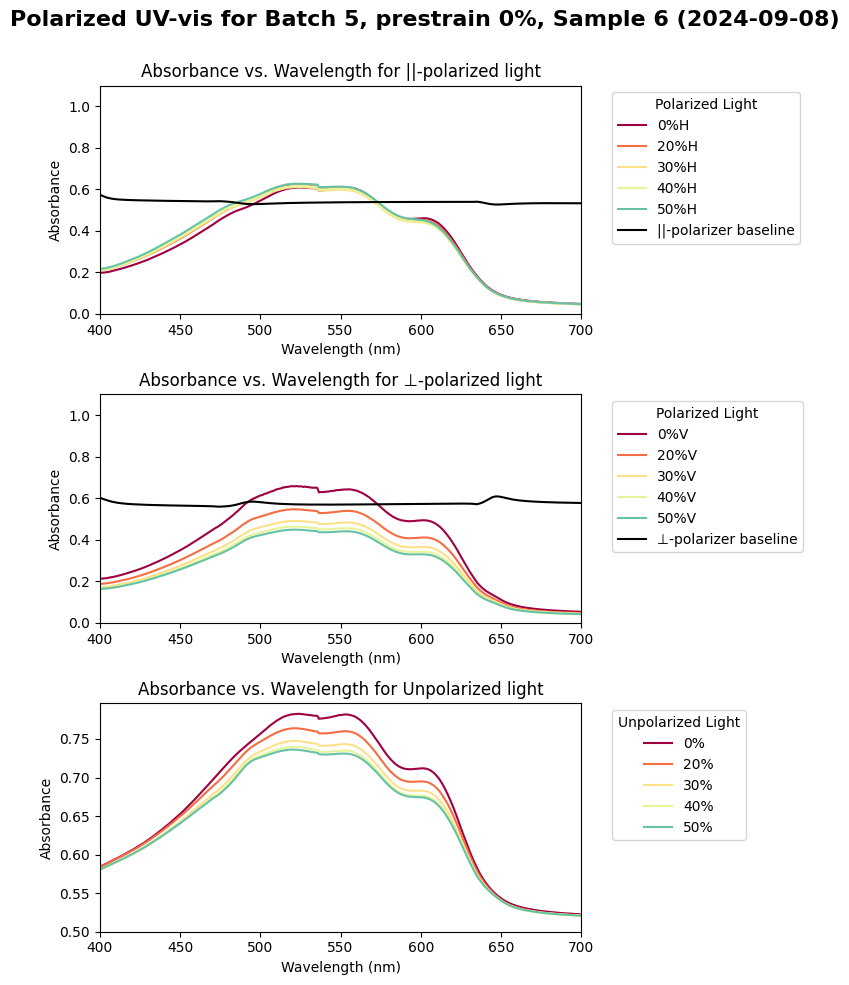

In [143]:
##### plotting #####

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set up figure with 3 subplots for polarized and unpolarized UV-vis data
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle(f'Polarized UV-vis for Batch 5, prestrain 0%, Sample {s_num} ({date})\n', fontsize=16, fontweight='bold')

# Generate colors for plotting
colors = cm.Spectral([i / ((df.shape[1] - 3)//3) for i in range((df.shape[1] - 1)//3)])
print(((df.shape[1] - 3)//3))
# Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    axs[0].plot(df['Wavelength'], df[column], label=column, color=colors[i])
axs[0].plot(df['Wavelength'], df['H_baseline'], label='||-polarizer baseline', color='k')
axs[0].set_title('Absorbance vs. Wavelength for ||-polarized light')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Absorbance')
axs[0].set_xlim((400, 700))
axs[0].set_ylim((0, 1.1))
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    axs[1].plot(df['Wavelength'], df[column], label=column, color=colors[i])
axs[1].plot(df['Wavelength'], df['V_baseline'], label='⊥-polarizer baseline', color='k')
axs[1].set_title('Absorbance vs. Wavelength for ⊥-polarized light')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Absorbance')
axs[1].set_xlim((400, 700))
axs[1].set_ylim((0, 1.1))
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Unpolarized Absorbance (columns without 'H' or 'V')
for i, column in enumerate([col for col in df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
    axs[2].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[2].set_title('Absorbance vs. Wavelength for Unpolarized light')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Absorbance')
axs[2].set_xlim((400, 700))
# axs[2].set_ylim((0, 1))
axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
